http://www.bdhammel.com/mle-map/

# Maximum Likelihood Estimation

we have P(w|X) = P(X|w) * P(w) / P(X)
- P(X|w): likelihood
- P(w): prior
- P(X): probability of seeing the data
- P(w|X): posterior

If we’re doing Maximum Likelihood Estimation, we do not consider prior information (this is another way of saying “we have a uniform prior”) [K. Murphy 5.3]. If we make no assumptions about the initial weight of our apple. **We’ll say all sizes of apples are equally likely** (we’ll revisit this assumption in the MAP approximation). In this case, the above equation reduces to

P(w|X) ~ P(X|w)

Let’s say you have a barrel of apples that are all different sizes. You pick an apple at random, and you want to know its weight. Unfortunately, all you have is a broken scale.

Std = 10

The grid approximation is probably the dumbest (simplest) way to do this. Basically, we’ll systematically step through different weight guesses, and compare what it would look like if this hypothetical weight were to generate data. We’ll compare this hypothetical data to our real data and pick the one the matches the best (find max P(X|wi) for wi in grid)

$$
P(X|w) = \prod_{i}^{N} p(x_i | w)
$$

$$
% <![CDATA[
\begin{align}
\log P(X|w) &= \log \prod_{i}^{N} p(x_i | w) \\
&= \sum_{i}^{N} \log p(d_i | w)
\end{align} %]]>
$$

or SUM( logpdf(X[i],w_guess,std) for i in range(X_length) )

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

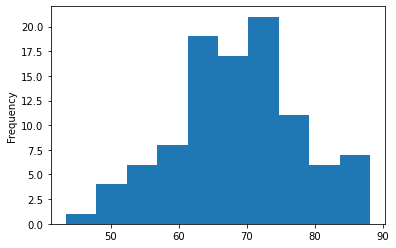

In [2]:
DATA = np.random.normal(69.62,10,100)
pd.Series(DATA).plot(kind='hist')

In [3]:
# using a grid approximation
from scipy.stats import norm # normal continuous random variable that can calculate pdf

In [4]:
weight_grid = np.linspace(0, 100)

In [5]:
likelihoods = [
  np.sum(norm(weight_guess, 10).logpdf(DATA)) for weight_guess in weight_grid
    # sum of log = multiplication of p(Xi|w_guess)
]

In [6]:
np.max(likelihoods) # log likelihood max

-363.3034679212669

In [7]:
weight = weight_grid[np.argmax(likelihoods)]

In [9]:
weight

69.38775510204081

# Maximum A Posterior (multiple parameters)

If we know something about the probability of Y (prior), we can incorporate it into the equation in the form of the prior P(Y)

In This case, Bayes’ laws has it’s original form.
$P(Y|X) \propto P(X|Y)P(Y)$

In the above examples we made the assumption that all apple weights were equally likely

In fact, a quick internet search will tell us that the average apple is between 70-100g. So, we can use this information to our advantage, and we encode it into our problem in the form of the prior.

Also, we don’t know what the standard deviation is, so we add another parameter $\sigma$

$$
P(w, \sigma|X) \propto P(X|w, \sigma)P(w, \sigma)
$$

By recognizing that weight is independent of scale error $P(w, \sigma) = P(w)P(\sigma)$


=> $P(w, \sigma|X) \propto P(X|w, \sigma)P(w)P(\sigma)$

See link for the gridsearch procedure to maximize posterior